## Mini-Projeto 2023 - 3.1 "Aplicação do PCA em reconhecimento de dígitos"
### Métricas em Machine Learning

A base de dados MNIST foi acedida a partir do website "WayBack Machine" (registo Março de 2023) através do link: https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/  ,  no dia 20 de dezembro de 2023

- Leitura das imagens dos dígitos

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 13

5


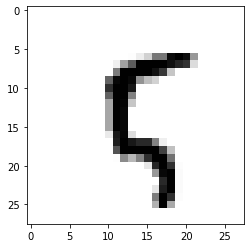

In [1]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'mnist_database/train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
size = len(imagearray) # nº de imagens para processar

print(imagearray.shape)
print(imagearray[100])

X = [] # novo repositório das imagens

for i in range(0,size):
    aux = imagearray[i].flatten() # transformar cada imagem (matriz) num array simples (linear)
    X.append(aux)
    
print(len(X))
print(X[100])

print(X[0])
    
# apenas um exemplo
plt.imshow(np.reshape(X[100], (28,28)), cmap=plt.cm.binary)

labelfile = 'mnist_database/train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labelfile)

print(labelarray[100])

Distribuição das Labels: 5923 ; 6742 ; 5958 ; 6131 ; 5842
 ; 5421 ; 5918 ; 6265 ; 5851 ; 5949


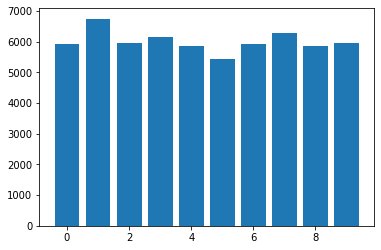

In [2]:
# Organizar as imagens por dígito

X_0 = []
X_1 = []
X_2 = []
X_3 = []
X_4 = []
X_5 = []
X_6 = []
X_7 = []
X_8 = []
X_9 = []

for i in range(0,len(X)):
    n = labelarray[i] 
    if n == 0:
        X_0.append(X[i])
    elif n==1:
        X_1.append(X[i])
    elif n==2:
        X_2.append(X[i])
    elif n==3:
        X_3.append(X[i])
    elif n==4:
        X_4.append(X[i])
    elif n==5:
        X_5.append(X[i])
    elif n==6:
        X_6.append(X[i])
    elif n==7:
        X_7.append(X[i])
    elif n==8:
        X_8.append(X[i])
    elif n==9:
        X_9.append(X[i])
 

print("Distribuição das Labels: "+str(len(X_0))+" ; "+str(len(X_1))+" ; "+str(len(X_2))+" ; "+str(len(X_3))+" ; "+str(len(X_4)))
print(" ; "+str(len(X_5))+" ; "+str(len(X_6))+" ; "+str(len(X_7))+" ; "+str(len(X_8))+" ; "+str(len(X_9)))

# Gráfico que mostra que cada número aparece aproximadamente igual a 6000 vezes
counts = [len(X_0), len(X_1), len(X_2), len(X_3), len(X_4), len(X_5), len(X_6), len(X_7), len(X_8), len(X_9)]
labels = [0,1,2,3,4,5,6,7,8,9]
plt.bar(labels, counts)
plt.show()

 - Exemplos de imagens para cada um dos dígitos

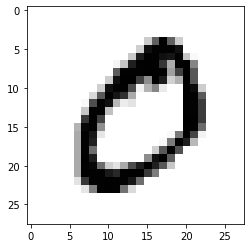

In [3]:
# exemplo de imagem dígito 0
plt.imshow(np.reshape(X_0[0], (28,28)), cmap=plt.cm.binary)

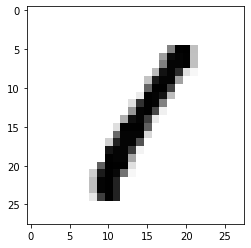

In [4]:
# exemplo de imagem dígito 1
plt.imshow(np.reshape(X_1[0], (28,28)), cmap=plt.cm.binary)

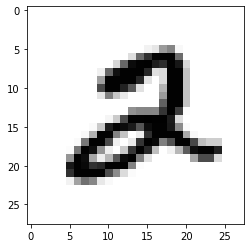

In [5]:
# exemplo de imagem dígito 2
plt.imshow(np.reshape(X_2[0], (28,28)), cmap=plt.cm.binary)

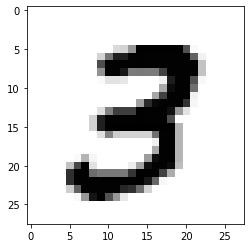

In [6]:
# exemplo de imagem dígito 3
plt.imshow(np.reshape(X_3[0], (28,28)), cmap=plt.cm.binary)

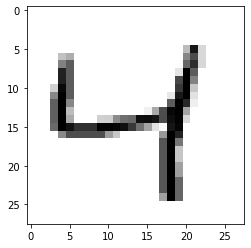

In [7]:
# exemplo de imagem dígito 4
plt.imshow(np.reshape(X_4[0], (28,28)), cmap=plt.cm.binary)

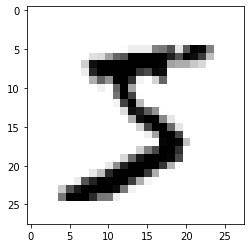

In [8]:
# exemplo de imagem dígito 5
plt.imshow(np.reshape(X_5[0], (28,28)), cmap=plt.cm.binary)

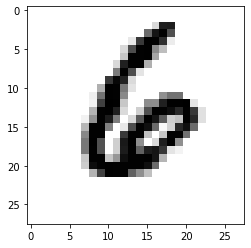

In [9]:
# exemplo de imagem dígito 6
plt.imshow(np.reshape(X_6[0], (28,28)), cmap=plt.cm.binary)

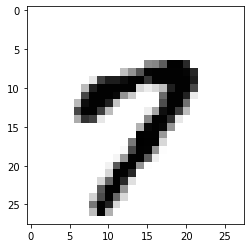

In [10]:
# exemplo de imagem dígito 7
plt.imshow(np.reshape(X_7[0], (28,28)), cmap=plt.cm.binary)

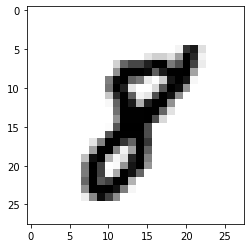

In [11]:
# exemplo de imagem dígito 8
plt.imshow(np.reshape(X_8[0], (28,28)), cmap=plt.cm.binary)

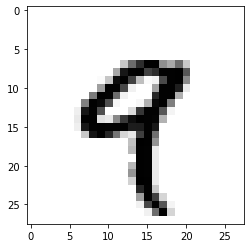

In [12]:
# exemplo de imagem dígito 9
plt.imshow(np.reshape(X_9[0], (28,28)), cmap=plt.cm.binary)

In [13]:
# Implementação do PCA (e visualização da imagem média dos dígitos)
# Obter os vetores próprios de acordo com um certo nivel de confianca
def pca(X, confianca_alvo):
    # Media de todas as imagens
    media = np.mean(X, 0)
    plt.imshow(np.reshape(media, (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito
    
    # Centralizar os dados
    phi = X - media
    
    # Calcular os vetores e valores proprios atraves do SVD
    vet_prop, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False) # v = variância
    val_prop = sigma*sigma
    
    # Ordenar valores próprios por ordem Decrescente
    idx = np.argsort(-val_prop)
    val_prop = val_prop[idx]
    vet_prop = vet_prop[:,idx]
    
    # Determinar o nº de vetores próprios a usar
    k = 0
    traco = np.sum(val_prop)
    confianca = 0
    while(confianca < confianca_alvo):
        confianca = np.sum(val_prop[:k])/traco
        k = k+1
    print("Número de vetores próprios a usar: " + str(k))
    
    # Escolher os vetores próprios associados
    vet_prop = vet_prop[:,0:k]
    return k, val_prop, vet_prop, phi, media, v, confianca

Número de vetores próprios a usar: 63


63

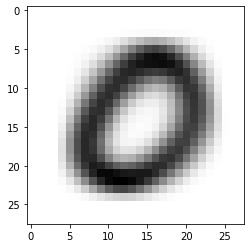

In [16]:
k_0, val_prop_0, vet_prop_0, phi_0, media_0, v_0, confianca_0 = pca(X_0, 0.9)

#len(vet_prop_0)
len(vet_prop_0[0])
#len(val_prop_0[0])
#val_prop_0[0]

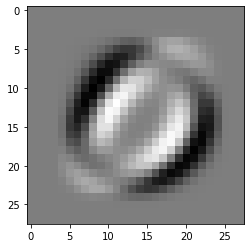

In [17]:
# Exemplo resultante de um vetores próprios / uma das componentes principais da imagem
plt.imshow(np.reshape(vet_prop_0.T[0], (28,28)), cmap=plt.cm.binary) # visualização da imagem média do dígito

# Depois fazer o mesmo para todos os outros dígitos: 1..9

In [19]:
# Calculo dos coeficientes da projecao
def coefProj(phi, vet_prop, size):
    coef_proj = [np.dot(phi[i], vet_prop) for i in range(size)]
    return coef_proj

# Obter os coeficientes das projecoes (para cada dígito)
coef_proj = coefProj(phi_0, vet_prop_0, len(X_0))
coef_proj

[array([-454.36574673, -357.71468028,  286.38489665, -453.13840509,
           9.43735223, -107.45309515,  162.40785965,   69.42281575,
        -544.71971591,  115.02474859,  -86.0510901 ,   50.97695927,
        -152.34417593,   97.17763273, -227.35448639,  277.98382776,
         -56.11032496,  235.67102627, -203.26156653,   47.65313951,
        -116.79757888,   62.30961853,  232.95315542,   14.43530413,
         -84.54764136,    2.01583447, -274.45299123,    8.92653207,
        -101.80226401,   37.19316463,  -19.93410957,   42.95014588,
         -61.81283592,  114.4795757 ,  -82.88400159,   31.35214905,
         -42.90363589,  111.60894905,  -70.59676667,   35.79758571,
         -74.83769933,   23.19924975,  -65.96116513,   15.38647224,
          65.10973877,  -62.80547224, -209.94084438,  104.86686217,
          22.65845426,  -62.739852  ,   -0.77376078,   -0.66683891,
          68.92419922,   14.7288085 ,   62.16352055,  -61.02539212,
         -20.25358525,  -51.31820705,   39.80092

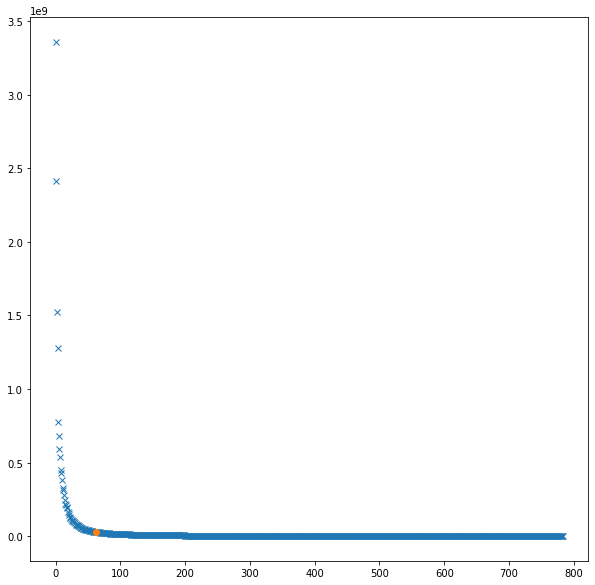

In [20]:
# Gráfico do Método do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, len(val_prop_0), 1)
plt.plot(t, val_prop_0, 'x')
plt.plot(k_0, val_prop_0[k_0], 'o')
plt.show()

### Preparação para os Testes

Funções úteis para o teste do modelo construído

In [21]:
import math

# Distancia euclidiana
def euclidiana(x, y):
    if x.size != y.size:
        return (-1)
    distancia = np.linalg.norm(x - y)
    return distancia

# Distance de Mahalanobis
def mahalanobis(x, y, val_prop, k):
    if len(x[0]) != len(y):
        return (-1) 
    N = len(x)
    distancia =[]
    for i in range(N):
        distancia.append(np.sum(np.divide((x[i]-y)**2, val_prop[:k]))) 
    return distancia

In [22]:
def test_coef_proj(gamma, media):
    test_phi = gamma - media # Centralizar os dados de gamma
    
    # Calcular os coeficientes de projeção 
    test_coef_proj = np.dot(test_phi, vet_prop)
    return test_coef_proj

def dist_min_euclidiana(test_coef_proj, vet_prop, val_prop, size, coef_proj):
    dist = [euclidiana(coef_proj[i], test_coef_proj) for i in range (size)]
    d_min = np.min(dist)
    return d_min

def dist_min_mahalanobis(test_coef_proj, vet_prop, val_prop, size, coef_proj):
    dist = mahalanobis(coef_proj, test_coef_proj, val_prop, vet_prop.shape[1])
    d_min = np.min(dist)
    return d_min

### Pré-estudo do dataset de teste

In [23]:
# 10 mil imagens de dígitos para teste
image_test_file = 'mnist_database/t10k-images.idx3-ubyte'
image_test_array = idx2numpy.convert_from_file(image_test_file)

gamma = [] # novo repositório das imagens de teste

for i in range(0,len(gamma)):
    aux = image_test_array[i].flatten() # transformar cada imagem (matriz) num array simples (linear)
    gamma.append(aux)

label_test_file = 'mnist_database/t10k-labels.idx1-ubyte'
label_test_array = idx2numpy.convert_from_file(label_test_file)

if not [label for label in label_test_array if label in [0,1,2,3,4,5,6,7,8,9]]:
    print("Existem dígitos diferentes de [0,1..9]")
else:
    print("Tudo certo")

Tudo certo


Como no dataset de teste todas as imagens são obrigatoriamente dígitos, então decidiu-se reduzir o estudo do modelo construído para reconhecimento de dígitos para estudar o dígito que fornece menor distância entre os coeficientes das projeções do modelo com os de teste da imagem atual; em vez de se estudar o reconheciemnto de um dígito pela comparação da distância mínima com um limite de similaridade (que pode produzir resultados inválidos, já que o limite é subjetivo a quem constroi o programa).

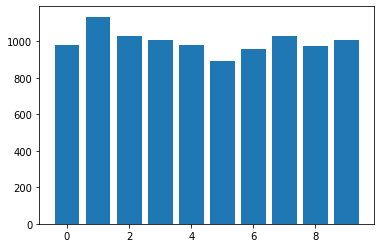

In [24]:
number_labels = [0,0,0,0,0,0,0,0,0,0]

for n in range(0,10000):
    if label_test_array[n] == 0:
        number_labels[0] = number_labels[0] + 1
    elif label_test_array[n] == 1:
        number_labels[1] = number_labels[1] + 1
    elif label_test_array[n] == 2:
        number_labels[2] = number_labels[2] + 1
    elif label_test_array[n] == 3:
        number_labels[3] = number_labels[3] + 1
    elif label_test_array[n] == 4:
        number_labels[4] = number_labels[4] + 1
    elif label_test_array[n] == 5:
        number_labels[5] = number_labels[5] + 1
    elif label_test_array[n] == 6:
        number_labels[6] = number_labels[6] + 1
    elif label_test_array[n] == 7:
        number_labels[7] = number_labels[7] + 1
    elif label_test_array[n] == 8:
        number_labels[8] = number_labels[8] + 1
    elif label_test_array[n] == 9:
        number_labels[9] = number_labels[9] + 1


plt.bar([0,1,2,3,4,5,6,7,8,9], number_labels)
plt.show()

In [25]:
number_labels

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

### Testes - Distância Euclidiana

In [ ]:
results_euclidiana_imagens = [] # cada valor indica a label da imagem no índice i

# nº de casos em que o dígito previsto é equivalente ao verdadeiro dígito da imagem
positives_euclidiana = [0,0,0,0,0,0,0,0,0,0]

for i in range(0,10000):
    imagem = gamma[i]
    label = label_test_array[i]
    for digito in range(0,10):
        

- Cálculo da Accuracy (resultados obtidos com a distância euclidiana)

In [ ]:
accuracy_euclidiana = sum(positives_euclidiana) / 10000    # total de 10000 imagens testadas

### Testes - Distância Mahalanobis

In [ ]:
results_mahalanobis_imagens = [] # cada valor indica a label da imagem no índice i

# nº de casos em que o dígito previsto é equivalente ao verdadeiro dígito da imagem
positives_mahalanobis = [0,0,0,0,0,0,0,0,0,0]

#for i in range(0,10000):

- Cálculo da Accuracy (resultados obtidos com a distância mahalanobis)

In [ ]:
accuracy_mahalanobis = sum(positives_mahalanobis) / 10000    # total de 10000 imagens testadas